# Via expressa para ônibus urbano

In [1]:
from _thread import *
from IPython.display import IFrame

import random
import threading
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Configuração para o algoritmo genético

In [2]:
totGeracoes  = 500
tamPopulacao = 50


indCruzamento = 5
CXPB = 0.5
MUTPB = 0.1
PROB_MUTACAO = 0.1
SEED_RANDOM = 64
#minimoAceitavel = 1
#pontuação baixo será eliminada do grafo
removerPior = 0

#fornecer ajuda para a evolucao do método
recebeAjuda  = False

# Ajuste de 1.0 -> maximização ou -1.0 -> minimização da feature
feature1 = 1.0
feature2 = 1.0
feature3 = -1.0

# Formato Imagens

In [3]:
'''
    Formatos Suportados salvar rotas e mapas: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz 
'''
formato_imgs = 'pdf'

# Configuração da Imagens

In [4]:
'''
    configuração da imagens
'''
edge_color = "#000000"         # cor da aresta
bgcolor    = "#D3D3D3"     # cor do background
node_color = "#9370DB"     # cor da vértice
node_size  = 30            # Tamanho do vértice
fig_height = 20           # altura figura
fig_width  = 20           # largura figura

# Localização para o OSMNX gerar o Grafo

In [5]:
place = 'Boa Vista, Roraima, BR'
Raio_distancia = 15000

G = ox.graph_from_address( place, network_type='drive', simplify=True, distance=Raio_distancia )

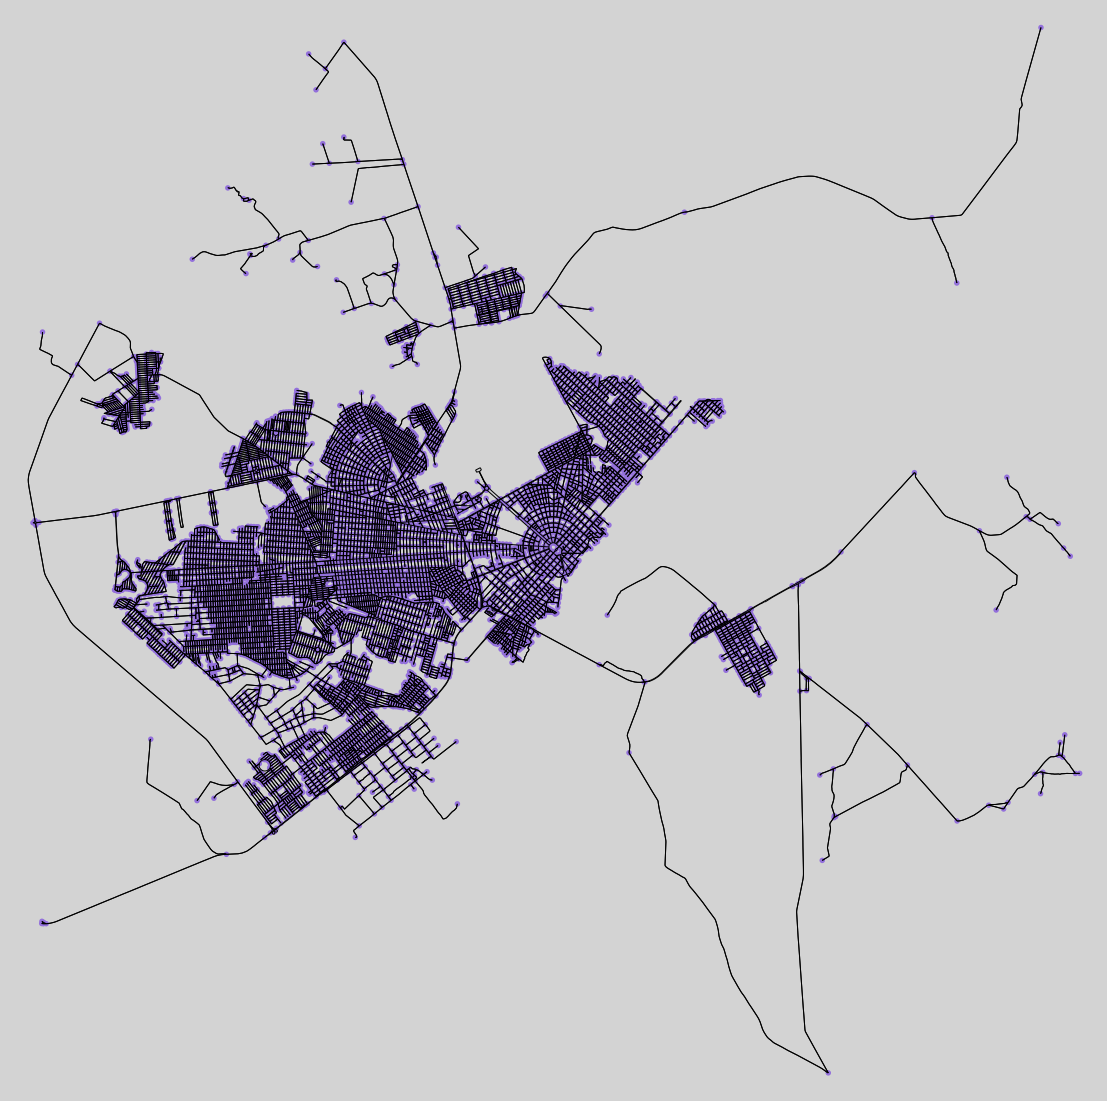

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1a07de4358>)

In [6]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaCompleto", save=True, file_format=formato_imgs)

# Vértice que representa o terminal de ônibus

In [7]:
nodosCentroCivico = ( 3648084763, 3648084762 )

# Extrai as informações das via do Grafo G

In [8]:
listaDados = []

dado = G.adj
for i in dado:
    for j in dado[i]:
        for k in dado[i][j]:
            print()
            print(dado[i][j][k])
            h = []
            h.append(i)
            h.append(j)
            h.append(dado[i][j][k])
            listaDados.append(h)


{'osmid': 348047232, 'oneway': True, 'name': 'Avenida A', 'highway': 'residential', 'length': 336.357}

{'osmid': 519374475, 'oneway': True, 'name': 'Avenida Pérola', 'highway': 'residential', 'length': 13.196}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 75.151}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 60.983999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a09140e10>}

{'osmid': 348047239, 'oneway': True, 'name': 'Avenida Uiramutã', 'highway': 'residential', 'length': 68.246}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 9.175}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid

{'osmid': 160263557, 'name': 'Rua Topázio', 'highway': 'residential', 'oneway': False, 'length': 68.328, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a001980f0>}

{'osmid': 160050965, 'name': 'Rua Sião', 'highway': 'residential', 'oneway': False, 'length': 52.155}

{'osmid': 160170176, 'name': 'Rua Silo', 'highway': 'residential', 'oneway': False, 'length': 86.085}

{'osmid': 655681245, 'name': 'Rua Sião', 'highway': 'residential', 'oneway': False, 'length': 29.437}

{'osmid': 160170152, 'name': 'Rua Dahas Abrahim', 'highway': 'residential', 'oneway': False, 'length': 62.899}

{'osmid': 160170164, 'name': 'Rua Oscar Martins dos Santos', 'highway': 'residential', 'oneway': False, 'length': 162.195}

{'osmid': 160170164, 'name': 'Rua Oscar Martins dos Santos', 'highway': 'residential', 'oneway': False, 'length': 160.619}

{'osmid': 160170152, 'name': 'Rua Dahas Abrahim', 'highway': 'residential', 'oneway': False, 'length': 59.232, 'geometry': <shapely.geometry.lines

{'osmid': 159230866, 'oneway': True, 'name': 'Avenida Parma', 'highway': 'tertiary', 'length': 102.098}

{'osmid': 159234278, 'name': 'Rua Jornalista Feutmann Gondim', 'highway': 'residential', 'oneway': False, 'length': 80.828}

{'osmid': 392653283, 'name': 'Rua Hélio Pinto Pinheiro', 'highway': 'residential', 'oneway': False, 'length': 381.735}

{'osmid': [392653285, 159234278], 'name': ['Rua Raquel da Silva Marquês', 'Rua Jornalista Feutmann Gondim'], 'highway': 'residential', 'oneway': False, 'length': 458.964, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a0013cb38>}

{'osmid': 159230847, 'name': 'Rua Bela Vista', 'highway': 'residential', 'oneway': False, 'length': 52.569}

{'osmid': 159230847, 'name': 'Rua Bela Vista', 'highway': 'residential', 'oneway': False, 'length': 50.137}

{'osmid': 159230858, 'name': 'Rua Floriano Peixoto', 'highway': 'residential', 'oneway': False, 'length': 129.875}

{'osmid': 159230860, 'name': 'Rua Bolonia', 'highway': 'residenti


{'osmid': 157802683, 'name': 'Alameda das Onze Horas', 'highway': 'residential', 'oneway': False, 'length': 92.315}

{'osmid': 717437798, 'name': 'Rua das Camélias', 'highway': 'residential', 'oneway': False, 'length': 36.012}

{'osmid': 717437798, 'name': 'Rua das Camélias', 'highway': 'residential', 'oneway': False, 'length': 60.407}

{'osmid': 156569530, 'name': 'Alameda dos Bambus', 'highway': 'secondary', 'oneway': False, 'length': 108.817}

{'osmid': 156569530, 'name': 'Alameda dos Bambus', 'highway': 'secondary', 'oneway': False, 'length': 12.332}

{'osmid': 159101697, 'name': 'Rua das Campainhas', 'highway': 'residential', 'oneway': False, 'length': 122.95700000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a00098588>}

{'osmid': 157802682, 'name': 'Via das Flores', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'length': 9.164000000000001, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a000985c0>}

{'osmid': 1


{'osmid': [718744232, 655960140], 'name': 'Rua Francisco Anacleto da Silva', 'highway': 'residential', 'oneway': False, 'length': 70.812, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a00082240>}

{'osmid': 129300209, 'name': 'Rua Raimundo Filgueiras', 'highway': 'residential', 'oneway': False, 'length': 181.203}

{'osmid': 655065871, 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 94.789}

{'osmid': 431279385, 'oneway': True, 'name': 'Avenida Felinto Barbosa Monteiro', 'highway': 'secondary', 'length': 148.97}

{'osmid': 431279386, 'name': 'Rua Cézar Nogueira Júnior', 'highway': 'residential', 'oneway': False, 'length': 66.793}

{'osmid': 431279387, 'name': 'Rua Cézar Nogueira Júnior', 'highway': 'residential', 'oneway': False, 'length': 11.957}

{'osmid': 129300433, 'name': 'Rua Edimilson José da Costa (Alicate)', 'highway': 'residential', 'oneway': False, 'length': 114.305}

{'osmid': 129300433, 'name': 'Rua Ed

{'osmid': 160276519, 'name': 'Avenida Brilho do Sol', 'highway': 'residential', 'oneway': False, 'length': 77.224}

{'osmid': 160280992, 'name': 'Rua Rio Claro', 'highway': 'residential', 'oneway': False, 'length': 168.848}

{'osmid': 160280992, 'name': 'Rua Rio Claro', 'highway': 'residential', 'oneway': False, 'length': 132.682}

{'osmid': 160280966, 'name': 'Rua Estrela Bonita', 'highway': 'residential', 'oneway': False, 'length': 158.475}

{'osmid': 160280966, 'name': 'Rua Estrela Bonita', 'highway': 'residential', 'oneway': False, 'length': 163.342}

{'osmid': 381241823, 'name': 'Rua Constelação', 'highway': 'residential', 'oneway': False, 'length': 79.892}

{'osmid': 381241823, 'name': 'Rua Constelação', 'highway': 'residential', 'oneway': False, 'length': 79.098}

{'osmid': 160279259, 'highway': 'residential', 'oneway': False, 'length': 79.272}

{'osmid': 160279259, 'highway': 'residential', 'oneway': False, 'length': 82.454}

{'osmid': 160280989, 'name': 'Rua Estrela do Sul', '

{'osmid': 655681243, 'oneway': True, 'name': 'Avenida Nazaré Filgueiras', 'highway': 'secondary', 'length': 87.144}

{'osmid': 430869519, 'name': 'Rua Papa João Paulo II', 'highway': 'residential', 'oneway': False, 'length': 64.105}

{'osmid': 430869519, 'name': 'Rua Papa João Paulo II', 'highway': 'residential', 'oneway': False, 'length': 82.809}

{'osmid': 718752661, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 166.545}

{'osmid': 718752661, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 317.845}

{'osmid': 129300441, 'name': 'Rua Cézar Nogueira Júnior', 'highway': 'residential', 'oneway': False, 'length': 165.897}

{'osmid': 129300441, 'name': 'Rua Cézar Nogueira Júnior', 'highway': 'residential', 'oneway': False, 'length': 165.431}

{'osmid': 160045447, 'name': 'Rua Pedro Aldemar Bantim', 'highway': 'residential', 'oneway': False, 'length': 75.662}

{'osmid': 160045447, 'name':


{'osmid': [655088113, 156360964, 156360967], 'oneway': True, 'ref': 'BR-174', 'name': 'Avenida Brasil', 'highway': 'primary', 'length': 757.538, 'bridge': 'viaduct', 'lanes': '2', 'maxspeed': '60', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a078d88d0>}

{'osmid': 160348245, 'name': 'Rua José Renato Hadad', 'highway': 'residential', 'oneway': False, 'length': 70.676}

{'osmid': [655088113, 180853203], 'oneway': True, 'ref': 'BR-174', 'name': 'Avenida Brasil', 'highway': 'primary', 'length': 690.341, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a078d8908>}

{'osmid': 226403705, 'oneway': True, 'ref': 'BR-174', 'name': 'Avenida Brasil', 'highway': 'primary', 'length': 105.747}

{'osmid': 383631813, 'name': 'Rua Levina Alves da Silva', 'highway': 'residential', 'oneway': False, 'length': 119.058}

{'osmid': 312245611, 'name': 'Rua Gaivota', 'highway': 'residential', 'oneway': False, 'length': 10.258}

{'osmid': 632167676, 'oneway': True, 'name


{'osmid': 494187305, 'name': 'Rua dos Tangarás', 'highway': 'residential', 'oneway': False, 'length': 118.546}

{'osmid': 494187305, 'name': 'Rua dos Tangarás', 'highway': 'residential', 'oneway': False, 'length': 70.771}

{'osmid': 157946550, 'oneway': True, 'name': 'Avenida Major Williams', 'highway': 'secondary', 'length': 109.494}

{'osmid': 730900598, 'name': 'Rua General Penha Brasil', 'highway': 'tertiary', 'oneway': False, 'length': 13.548}

{'osmid': 91888085, 'name': 'Rua Severino Mineiro', 'highway': 'residential', 'oneway': False, 'length': 160.257}

{'osmid': 91888085, 'name': 'Rua Severino Mineiro', 'highway': 'residential', 'oneway': False, 'length': 260.51}

{'osmid': 696242088, 'oneway': True, 'lanes': '2', 'name': 'Avenida General Ataíde Teive', 'highway': 'secondary', 'maxspeed': '50', 'length': 101.373}

{'osmid': 91888088, 'name': 'Rua Cristóvão Coelho', 'highway': 'tertiary', 'oneway': False, 'length': 121.183}

{'osmid': 335971361, 'oneway': True, 'name': 'Aveni


{'osmid': 129300226, 'name': 'Rua José Queiroz', 'highway': 'residential', 'oneway': False, 'length': 134.175}

{'osmid': 680595334, 'oneway': True, 'name': 'Rua José Aleixo', 'highway': 'tertiary', 'length': 93.597}

{'osmid': 129300226, 'name': 'Rua José Queiroz', 'highway': 'residential', 'oneway': False, 'length': 238.67, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a00153c88>}

{'osmid': 129300449, 'name': 'Rua Afonso dos Santos Pereira', 'highway': 'residential', 'oneway': False, 'length': 82.418}

{'osmid': 129300449, 'name': 'Rua Afonso dos Santos Pereira', 'highway': 'residential', 'oneway': False, 'length': 79.45}

{'osmid': 532407014, 'name': 'Rua Telma Cavalcante', 'highway': 'residential', 'oneway': False, 'length': 218.913}

{'osmid': 532407014, 'name': 'Rua Telma Cavalcante', 'highway': 'residential', 'oneway': False, 'length': 164.302}

{'osmid': 129300410, 'oneway': False, 'name': 'Rua Julieta Pereira de Melo', 'highway': 'residential', 'length':

{'osmid': 160367828, 'name': 'Rua N', 'highway': 'residential', 'oneway': False, 'length': 275.318}

{'osmid': 160367801, 'lanes': '2', 'name': 'Rua Sirius', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'length': 75.235}

{'osmid': 160367801, 'lanes': '2', 'name': 'Rua Sirius', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'length': 74.831}

{'osmid': 719520030, 'name': 'Rua Peixes', 'highway': 'residential', 'oneway': False, 'length': 311.444}

{'osmid': 719520030, 'name': 'Rua Peixes', 'highway': 'residential', 'oneway': False, 'length': 299.636}

{'osmid': 160367755, 'name': 'Rua L', 'highway': 'residential', 'oneway': False, 'length': 56.496}

{'osmid': 160367755, 'name': 'Rua L', 'highway': 'residential', 'oneway': False, 'length': 76.649}

{'osmid': 160367833, 'name': 'Rua C', 'highway': 'residential', 'oneway': False, 'length': 265.755}

{'osmid': 160367833, 'name': 'Rua C', 'highway': 'residential', 'oneway': False, 'length': 275.229}

{'osmid': 1


{'osmid': 91888027, 'name': 'Rua Antônio Cabral', 'highway': 'residential', 'oneway': False, 'length': 57.852}

{'osmid': 91888027, 'name': 'Rua Antônio Cabral', 'highway': 'residential', 'oneway': False, 'length': 58.136}

{'osmid': 154913944, 'name': 'Rua Brigadeiro Oliveira', 'highway': 'residential', 'oneway': False, 'length': 94.191}

{'osmid': 154913944, 'name': 'Rua Brigadeiro Oliveira', 'highway': 'residential', 'oneway': False, 'length': 119.273}

{'osmid': 91888089, 'oneway': True, 'name': 'Avenida Eldorado', 'highway': 'tertiary', 'length': 69.353}

{'osmid': 160827959, 'name': 'Rua Caracaranã', 'highway': 'residential', 'oneway': False, 'length': 168.16, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f1a000b9f60>}

{'osmid': 91888047, 'name': 'Rua Macunaíma', 'highway': 'residential', 'oneway': False, 'length': 61.387}

{'osmid': 91888047, 'name': 'Rua Macunaíma', 'highway': 'residential', 'oneway': False, 'length': 59.336}

{'osmid': 154913827, 'name': '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Gera uma lista com as pontuações que cada aresta recebeu dentre as suas características

In [9]:
listaValores = []
valorRuim = -1

for i in listaDados:
    soma = 0
    #print(i[2]['osmid'])    
    
    #---------------------------------------------------------------------------------------------------------            
    '''
    if 'maxspeed' in i[2] and isinstance( i[2]['maxspeed'], int ):
        if int(i[2]['maxspeed']) < 40 and int(i[2]['maxspeed']) > 60 or 'maxspeed' not in i[2]:
            soma = valorRuim
        else:
            soma += 5
    else:
        if 'maxspeed' in i[2]:
            p = 0
            j = 0
            for k in i[2]['maxspeed']:
                p += int(k)
                j+=1
            soma += (p/j)
        else:
            soma = valorRuim
    '''
    
    #---------------------------------------------------------------------------------------------------------
    if "highway" in i[2]:
        if i[2]['highway'] == "residential": #ex Rua Chicó Lira
            soma = valorRuim
        elif i[2]['highway'] == "primary": #ex: avenida venezuela
            soma = 1
        elif i[2]['highway'] == "secondary": #ex: Major Williams
            soma = 1
        elif i[2]['highway'] == "tertiary": #ex: Rua General Penha Brasil
            soma = 1
        else:
            soma = valorRuim
    
    
    #---------------------------------------------------------------------------------------------------------    
    #total de faixas da via
    '''
    if ("lanes" in i[2]) and ("oneway" in i[2]):
        liness = i[2]['lanes']
        if isinstance(liness , list):
            for d in liness:
                soma += int(d)
        else:
            soma = (int(liness) * 5) + 5 + soma
    else:
        
        if "lanes" in i[2]:
            soma +=  int(i[2]['lanes']) * 5
            
        #o resultado da maioria
        if "oneway" in i[2]:
            if i[2]['oneway'] == True:
                soma += 5                
            else:
                soma = valorRuim
    '''
    
    listaValores.append(soma)


# Separa os vértices que não conseguiram atingir a pontuação mínima para remoção do Grafo

In [10]:
remover = []

for i in range(len(listaValores)):
    #if listaValores[i] <= 0:
    if listaValores[i] <= removerPior:
        remover.append( (listaDados[i][0], listaDados[i][1]))
        
#remove as arestas que foram selecionadas como ruins 
G.remove_edges_from(remover)

# Atualiza a lista de arestas que estão aptas a serem selecionadas

In [11]:
listaValoresNew = []
listaDadosNew = []

for i in range(len(listaDados)):
    if listaValores[i] >= removerPior:
        listaValoresNew.append( listaValores[i] )
        listaDadosNew.append( listaDados[i] )

#remover os dados antigos para devolver memória
listaDados.clear()
listaValores.clear()
print(len(listaValoresNew))

7009


In [12]:
'''
    Acesso aos dados!

print(listaDadosNew[0])
print()
print(listaDadosNew[0][0])
print()
print(listaDadosNew[0][1])
print()
print(listaDadosNew[0][2])
print()
print(listaDadosNew[0][2]['name'])
'''

"\n    Acesso aos dados!\n\nprint(listaDadosNew[0])\nprint()\nprint(listaDadosNew[0][0])\nprint()\nprint(listaDadosNew[0][1])\nprint()\nprint(listaDadosNew[0][2])\nprint()\nprint(listaDadosNew[0][2]['name'])\n"

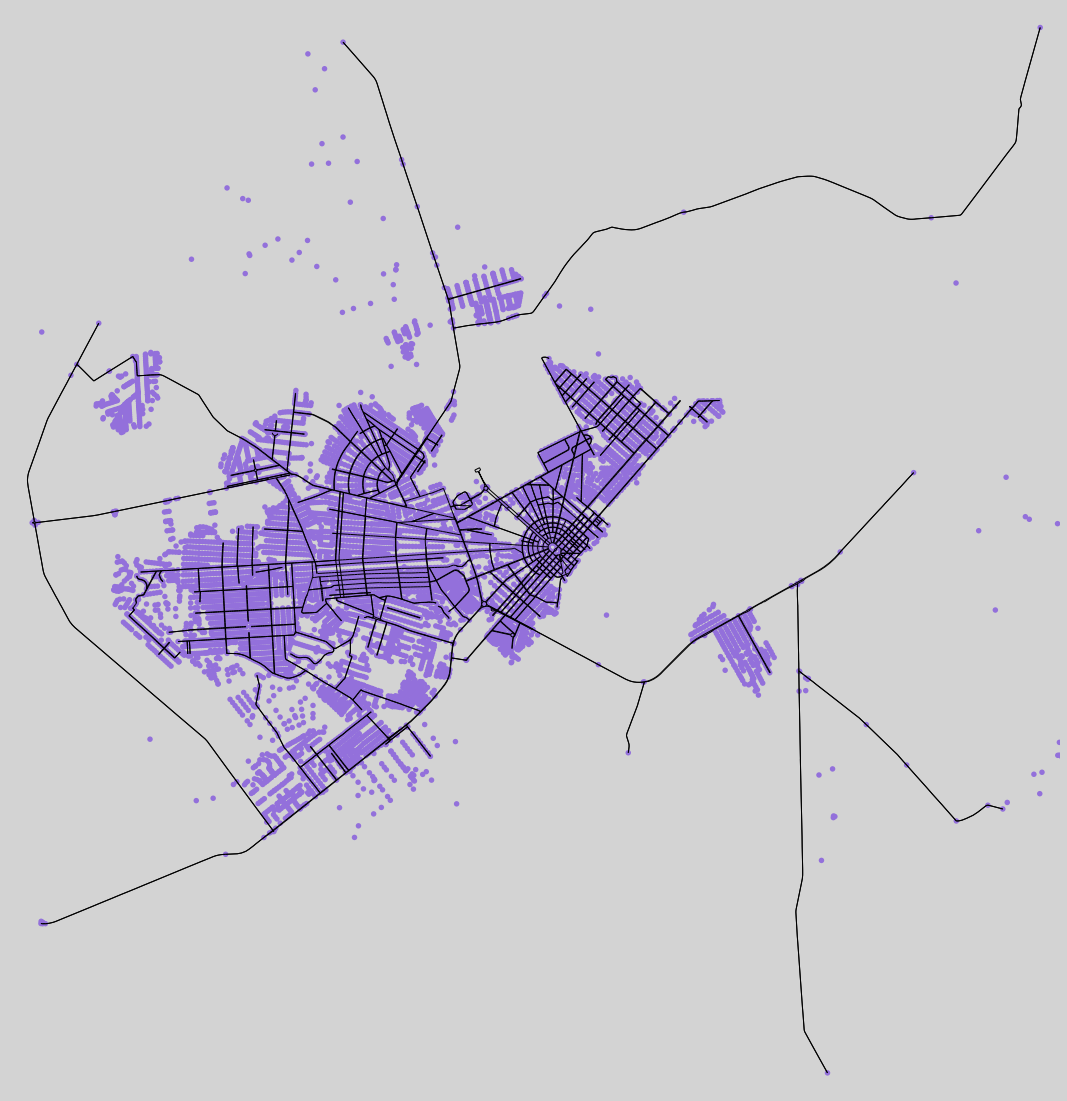

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1a07b024a8>)

In [13]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaFiltrado", save=True,  file_format=formato_imgs)

# Lista que receberá os caminhos encontrados pelo AG

In [14]:
listaResultadoDFS = []
tamanhoDosCiclosSalvos = []

# Lista para salvar as informações da evolução do AG para plotagem de gráfico ao final do experimento

In [15]:
PlotMinDadosONEMAX  = []
PlotMeanDadosONEMAX = []
PlotMaxDadosONEMAX  = []

PlotMinDadosDFS  = []
PlotMeanDadosDFS = []
PlotMaxDadosDFS  = []

PlotMinDistDFS = []
PlotMeanDistDFS = []
PlotMaxDistDFS = []

# Controle dos ciclos

In [16]:
PlotMaioresCiclos = []
PlotMaioresCiclos.append(0)

# Listas para serem usadas com multi-thread na etapa de Fitness 

In [17]:
parada = False
tamGenes = len(listaValoresNew)
fitnesses = [(0,)]*tamPopulacao

In [18]:
lenghtListaDadosnew = len(listaDadosNew)

# Busca em profundidade que encontrará os caminhos caso exista

In [19]:
def DFS_BuscaCiclo(grafo, mapa, mapaGrafo, verticeInicial, tamGrafo):
    
    import stack    
    pilha = stack.stack()
    v = verticeInicial
    
    #vetor de marcação de visitados e de elementos que estão na pilha O(1)
    visitados = []
    pilha_rec = []
    
    for i in range(tamGrafo):
        visitados.append(False)
        pilha_rec.append(False)
    
        
    it = -1
    contListaPercorrida = 0
    contDistPercorrida  = 0
    semDistancia = 0
    listaPercorrida = []
    controleMaiorCiclo = PlotMaioresCiclos[-1]
    
    #inicio da BFS
    while True:
        achou_vizinho = False        
        
        listaPercorrida.append(v)
        contListaPercorrida += 1
                
        if not visitados[ mapa[ v ] ]:
            x = mapa[ v ]
            
            pilha.empilhar( x )
            visitados[ x ] = True
            pilha_rec[ x ] = True
            
            
        for it in grafo[v]:
            
            #se tiver na pilha é porque possue ciclo - Achou um Ciclo          
            if pilha_rec[ mapa[ it ] ] and it == verticeInicial:
                
                listaArestasCiclo = []
                
                for k in listaPercorrida:
                    if pilha_rec[ mapa[ k ] ] == True:
                        listaArestasCiclo.append( k )
                        
                tamList = len( listaArestasCiclo )
                
                '''
                    sempre salva ciclos maiores!
                '''
                if tamList > controleMaiorCiclo:
                    controleMaiorCiclo = tamList
                    
                    PlotMaioresCiclos.append( controleMaiorCiclo )
                                                        
                    '''
                        Pega o ciclo para salvar
                    '''
                    
                    cicloAtual = []
                    
                    for k in range(1, len(listaArestasCiclo)):
                        cicloAtual.append( (listaArestasCiclo[k-1], listaArestasCiclo[k]) )
                    cicloAtual.append( ( listaArestasCiclo[-1], listaArestasCiclo[0] ) )
                    
                    cicloAtualList = list( cicloAtual )
                    listaResultadoDFS.append( cicloAtualList )
                    tamanhoDosCiclosSalvos.append( tamList )
                    
                else:
                    achou_vizinho = False
                    break
                
                    
            if not visitados[ mapa[ it ] ]:
                achou_vizinho = True
                break
                
        if not achou_vizinho:
            pilha_rec[ pilha.topo() ] = False
                
            pilha.desempilhar()
            
            if pilha.p_vazia():
                break
                
            v = mapaGrafo[ pilha.topo() ]
        
        else:
            # -------- pegar a distancia de A -> B ---------
            # do vertice A
            verticeAtual = v
            # para o vertice B
            verticeNovo  = it
            
            '''
            print(listaDadosNew[0])
            print()
            print(listaDadosNew[0][0])
            print()
            print(listaDadosNew[0][1])
            print()
            print(listaDadosNew[0][2])
            print()
            print(listaDadosNew[0][2]['name'])

            [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

            321519672

            3589971255

            {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary',
            'length': 18.205}

            Rua Coronel Pinto

            '''
            try:

                '''
                    Pegar a distancia percorrida pela DFS..
                '''
                            
                for lista_i in range(lenghtListaDadosnew):            
                    if( listaDadosNew[lista_i][0] == verticeAtual and listaDadosNew[lista_i][1] == verticeNovo ):

                        if 'length' in listaDadosNew[lista_i][2]:
                            lenghtAresta = float(listaDadosNew[lista_i][2]['length'])
                            contDistPercorrida  = float(contDistPercorrida + lenghtAresta)
                        else:
                            semDistancia = semDistancia + 1
            except:
                print("Erro na distancia...")
            
            
            
            # ---------------------------------------------
            
            # da busca em profundidade troca o vertice para o proximo
            # ---- NAO mexer ----------
            v =  it
            # -------------------------
    
    '''
        calcular a distancia achada + a media das distancias nao achadas
    '''
    
    
    # distancia percorrida
    distanciaFinal = ( contDistPercorrida ) + ( 15 * semDistancia )
    #print("Distancia percorrida: {}".format(distanciaFinal))   
    
    '''
        Falta retornar a distancia percorrida junto com a contListaPercorrida
    '''
    
    # Retorna a quantidade de arestas visitadas na busca em profundidade
    return contListaPercorrida, distanciaFinal

# Função que executa um filtro para remover as arestas não selecionadas pelo AG e envia a DFS para validação de rotas

In [20]:
def temCicloDFS(individuo):
    
    # cópia do grafo
    G_aux = G.copy()
    
    # ajuda na evolução do onemax
    if recebeAjuda == True:
        
        tam = tamGenes        
        
        for i in range(10):            
            posicao = random.randint(0,tam-1)
            individuo[posicao] = 1
            
        
                
    #identificador da posicao do nodo centro cívico para verificar se esta ativo
    for i in range(tamGenes):
        if listaDadosNew[i][0] == nodosCentroCivico[0] and listaDadosNew[i][1] == nodosCentroCivico[1]:
            individuo[i] = 1            
            break;
            
    
    #lista para remover os nós não selecionados pelo AG
    listaRemover = []            
        
    #Seleção dos nodos não selecionados
    for i in range(len(individuo)):
        if individuo[i] == 0:
            listaRemover.append( (listaDadosNew[i][0], listaDadosNew[i][1]) )            
        
        
    #Remove os nodos não selecionados pelo AG
    G_aux.remove_edges_from( listaRemover )
    
    
    
    #listaMapa recebe os valores de [0 a totNodos]
    listaMapa = []
    for i in range(len(G_aux.nodes)):
        listaMapa.append(i)
    
    
    # 215151515 --> 10
    mapa = pd.Series(index=G_aux.nodes, data=listaMapa)
    # 10 --> 215151515
    mapaGrafo = pd.Series(G_aux.nodes)
    
    
    '''
        DFS --- Busca um ciclo a partir do terminal de ônibus do centro Cívico 
    
    '''
       
    return DFS_BuscaCiclo(G_aux, mapa, mapaGrafo, nodosCentroCivico[0], len(G_aux.nodes))

# DEAP - ONEMAX

In [21]:
from deap import base
from deap import creator
from deap import tools
from deap import creator, base, tools, algorithms
import random


/home/felipe/.conda/envs/OSMNX/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [22]:
#1) onemax
#2) DFS
#3) distancia percorrida DFS

creator.create("FitnessMulti", base.Fitness, weights=(feature1, feature2, feature3))
creator.create("Individual", list, fitness=creator.FitnessMulti)

def evalFitness(individual):
    tamDFS, distanciaDFS = temCicloDFS(individual)
    return np.sum(individual), tamDFS, distanciaDFS
    #return np.sum(individual), temCicloDFS(individual)


toolbox = base.Toolbox()
toolbox.register("bit", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.bit, tamGenes)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=tamPopulacao)
toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selNSGA2)



def main():
    
    #random.seed(SEED_RANDOM)   
    population = toolbox.population()
    fits = toolbox.map(toolbox.evaluate, population)
    
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit
    
    print("Start of evolution")
            
    for gen in range(totGeracoes):
        
        if parada:
            break
        
        print('\nGERAÇÃO: {}'.format(gen+1))
        offspring = algorithms.varOr(population, toolbox, lambda_=tamPopulacao, cxpb=0.5, mutpb=0.1)
        fits = toolbox.map(toolbox.evaluate, offspring)
        
        l_onemax = []
        l_dfs = []
        l_dist = []
        
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit            
            x, y, z = fit
            l_onemax.append(x)
            l_dfs.append(y)
            l_dist.append(z)
            #print("{}  {} {}".format(x, y, z))
            
        population = toolbox.select(offspring + population, k=tamPopulacao)
        
        # ONEMAX
        minimo = int(np.min(l_onemax))
        maximo = int(np.max(l_onemax))
        media  = int(np.mean(l_onemax))
        dif = maximo - minimo        
        print("ONEMAX: {}      {}      {}      {}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosONEMAX.append(minimo)
        PlotMeanDadosONEMAX.append(media)
        PlotMaxDadosONEMAX.append(maximo)
        
        # DFS
        minimo = int(np.min(l_dfs))
        maximo = int(np.max(l_dfs))
        media  = int(np.mean(l_dfs))
        dif = maximo - minimo        
        print("DFS:       {}         {}       {}      {}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosDFS.append(minimo)
        PlotMeanDadosDFS.append(media)
        PlotMaxDadosDFS.append(maximo)
        
        # DISTÂNCIA
        minimo = int(np.min(l_dist))
        maximo = int(np.max(l_dist))
        media  = int(np.mean(l_dist))
        dif = maximo - minimo        
        print("DIST:    {}         {}       {}      {}".format(minimo,media , maximo, dif))
        PlotMinDistDFS.append(minimo)
        PlotMeanDistDFS.append(media)
        PlotMaxDistDFS.append(maximo)
        
    print("-- End of (successful) evolution --")
        
if __name__ == "__main__":
    main()

Start of evolution

GERAÇÃO: 1
ONEMAX: 3409      3499      3611      202
DFS:       3         13       71      68
DIST:    69         661       3645      3576

GERAÇÃO: 2
ONEMAX: 3402      3496      3554      152
DFS:       3         26       137      134
DIST:    69         1427       7872      7803

GERAÇÃO: 3
ONEMAX: 3432      3508      3630      198
DFS:       3         38       137      134
DIST:    69         2085       7872      7803

GERAÇÃO: 4
ONEMAX: 3410      3533      3630      220
DFS:       3         31       137      134
DIST:    69         1634       7872      7803

GERAÇÃO: 5
ONEMAX: 3410      3526      3637      227
DFS:       3         41       137      134
DIST:    69         2164       7872      7803

GERAÇÃO: 6
ONEMAX: 3400      3508      3635      235
DFS:       3         39       121      118
DIST:    69         2005       6945      6876

GERAÇÃO: 7
ONEMAX: 3392      3521      3615      223
DFS:       9         44       137      128
DIST:    190         2308    

ONEMAX: 3484      3664      3778      294
DFS:       5         193       383      378
DIST:    119         9032       18149      18030

GERAÇÃO: 58
ONEMAX: 3505      3677      3778      273
DFS:       9         171       383      374
DIST:    304         8184       18149      17845

GERAÇÃO: 59
ONEMAX: 3583      3690      3778      195
DFS:       5         147       391      386
DIST:    119         6969       18473      18354

GERAÇÃO: 60
ONEMAX: 3508      3667      3806      298
DFS:       11         151       391      380
DIST:    489         7099       18473      17984

GERAÇÃO: 61
ONEMAX: 3508      3668      3806      298
DFS:       5         141       391      386
DIST:    119         6692       18473      18354

GERAÇÃO: 62
ONEMAX: 3495      3669      3808      313
DFS:       11         157       391      380
DIST:    489         7382       18473      17984

GERAÇÃO: 63
ONEMAX: 3495      3693      3809      314
DFS:       17         193       393      376
DIST:    847         90

ONEMAX: 3620      3792      3924      304
DFS:       3         191       475      472
DIST:    69         8917       21285      21216

GERAÇÃO: 114
ONEMAX: 3612      3756      3924      312
DFS:       11         183       451      440
DIST:    414         8546       20235      19821

GERAÇÃO: 115
ONEMAX: 3627      3780      3924      297
DFS:       3         229       457      454
DIST:    69         10591       20940      20871

GERAÇÃO: 116
ONEMAX: 3620      3771      3932      312
DFS:       3         237       475      472
DIST:    69         10840       21285      21216

GERAÇÃO: 117
ONEMAX: 3616      3753      3932      316
DFS:       15         238       475      460
DIST:    480         10792       21285      20805

GERAÇÃO: 118
ONEMAX: 3642      3794      3933      291
DFS:       13         229       475      462
DIST:    369         10537       21285      20916

GERAÇÃO: 119
ONEMAX: 3617      3781      3933      316
DFS:       3         275       475      472
DIST:    69     

ONEMAX: 3755      3876      3979      224
DFS:       9         298       503      494
DIST:    438         14040       23229      22791

GERAÇÃO: 169
ONEMAX: 3749      3883      3982      233
DFS:       3         283       503      500
DIST:    69         13434       23008      22939

GERAÇÃO: 170
ONEMAX: 3755      3860      3964      209
DFS:       9         221       503      494
DIST:    438         10456       23229      22791

GERAÇÃO: 171
ONEMAX: 3678      3869      3982      304
DFS:       3         237       491      488
DIST:    69         11194       22981      22912

GERAÇÃO: 172
ONEMAX: 3766      3878      3982      216
DFS:       3         272       503      500
DIST:    69         12880       23229      23160

GERAÇÃO: 173
ONEMAX: 3678      3871      3982      304
DFS:       3         293       501      498
DIST:    69         13694       23156      23087

GERAÇÃO: 174
ONEMAX: 3678      3857      3982      304
DFS:       3         233       511      508
DIST:    69       

ONEMAX: 3658      3865      4008      350
DFS:       5         301       515      510
DIST:    119         14167       24038      23919

GERAÇÃO: 224
ONEMAX: 3667      3865      3986      319
DFS:       5         238       519      514
DIST:    119         11276       23717      23598

GERAÇÃO: 225
ONEMAX: 3663      3863      4003      340
DFS:       35         296       573      538
DIST:    1796         13869       27967      26171

GERAÇÃO: 226
ONEMAX: 3636      3813      3993      357
DFS:       25         280       573      548
DIST:    1374         13014       27967      26593

GERAÇÃO: 227
ONEMAX: 3642      3842      3996      354
DFS:       33         311       575      542
DIST:    1718         14452       28058      26340

GERAÇÃO: 228
ONEMAX: 3642      3827      4008      366
DFS:       31         281       517      486
DIST:    1506         13144       24313      22807

GERAÇÃO: 229
ONEMAX: 3663      3832      4008      345
DFS:       25         314       517      492
DIST:

ONEMAX: 3939      4003      4008      69
DFS:       231         429       441      210
DIST:    11311         20343       20857      9546

GERAÇÃO: 279
ONEMAX: 3922      4002      4008      86
DFS:       337         436       441      104
DIST:    15247         20648       20857      5610

GERAÇÃO: 280
ONEMAX: 3936      4003      4008      72
DFS:       325         435       441      116
DIST:    15842         20626       20857      5015

GERAÇÃO: 281
ONEMAX: 3950      4003      4008      58
DFS:       297         434       441      144
DIST:    13857         20534       20857      7000

GERAÇÃO: 282
ONEMAX: 3950      4002      4008      58
DFS:       241         433       441      200
DIST:    12824         20512       20962      8138

GERAÇÃO: 283
ONEMAX: 3927      4001      4010      83
DFS:       325         431       441      116
DIST:    14594         20404       20857      6263

GERAÇÃO: 284
ONEMAX: 3925      3995      4008      83
DFS:       11         410       441      430
DI

ONEMAX: 3931      4001      4008      77
DFS:       301         432       441      140
DIST:    13283         20439       20857      7574

GERAÇÃO: 334
ONEMAX: 3925      4003      4008      83
DFS:       297         435       463      166
DIST:    13725         20561       21828      8103

GERAÇÃO: 335
ONEMAX: 3953      4004      4008      55
DFS:       35         430       441      406
DIST:    1723         20425       20857      19134

GERAÇÃO: 336
ONEMAX: 3915      4000      4008      93
DFS:       259         427       441      182
DIST:    11791         20226       20857      9066

GERAÇÃO: 337
ONEMAX: 3930      4005      4008      78
DFS:       267         437       465      198
DIST:    12779         20686       21445      8666

GERAÇÃO: 338
ONEMAX: 3945      4003      4008      63
DFS:       341         435       441      100
DIST:    15162         20573       20857      5695

GERAÇÃO: 339
ONEMAX: 3973      4007      4008      35
DFS:       145         435       441      296
DI

ONEMAX: 3927      4003      4008      81
DFS:       249         432       441      192
DIST:    13209         20513       21289      8080

GERAÇÃO: 389
ONEMAX: 3943      4001      4008      65
DFS:       363         436       471      108
DIST:    16890         20697       22362      5472

GERAÇÃO: 390
ONEMAX: 3943      4004      4008      65
DFS:       43         427       443      400
DIST:    2143         20184       21297      19154

GERAÇÃO: 391
ONEMAX: 3969      4006      4008      39
DFS:       399         439       441      42
DIST:    18308         20764       20857      2549

GERAÇÃO: 392
ONEMAX: 3955      4005      4008      53
DFS:       141         428       441      300
DIST:    7545         20299       20857      13312

GERAÇÃO: 393
ONEMAX: 3927      4000      4008      81
DFS:       37         412       441      404
DIST:    1883         19547       20857      18974

GERAÇÃO: 394
ONEMAX: 3925      4003      4008      83
DFS:       345         435       441      96
DIST:

ONEMAX: 3941      4002      4008      67
DFS:       229         432       441      212
DIST:    12271         20460       21086      8815

GERAÇÃO: 444
ONEMAX: 3940      4001      4008      68
DFS:       107         425       441      334
DIST:    5441         20146       20857      15416

GERAÇÃO: 445
ONEMAX: 3947      4005      4008      61
DFS:       391         437       441      50
DIST:    18292         20691       20857      2565

GERAÇÃO: 446
ONEMAX: 3955      4005      4008      53
DFS:       297         437       445      148
DIST:    14354         20671       20980      6626

GERAÇÃO: 447
ONEMAX: 3927      4004      4008      81
DFS:       393         438       441      48
DIST:    18698         20735       20857      2159

GERAÇÃO: 448
ONEMAX: 3945      4004      4008      63
DFS:       7         427       441      434
DIST:    359         20262       20857      20498

GERAÇÃO: 449
ONEMAX: 3924      4000      4008      84
DFS:       163         422       441      278
DIST: 

ONEMAX: 3938      4005      4008      70
DFS:       381         439       441      60
DIST:    17806         20761       20857      3051

GERAÇÃO: 498
ONEMAX: 3940      4005      4008      68
DFS:       105         427       441      336
DIST:    5207         20255       20857      15650

GERAÇÃO: 499
ONEMAX: 3938      4004      4008      70
DFS:       245         434       441      196
DIST:    13387         20593       20857      7470

GERAÇÃO: 500
ONEMAX: 3931      3998      4008      77
DFS:       93         417       441      348
DIST:    4725         19781       20857      16132
-- End of (successful) evolution --


# Gráfico da Evolução do AG dentre as gerações com máximo, média e mínimo

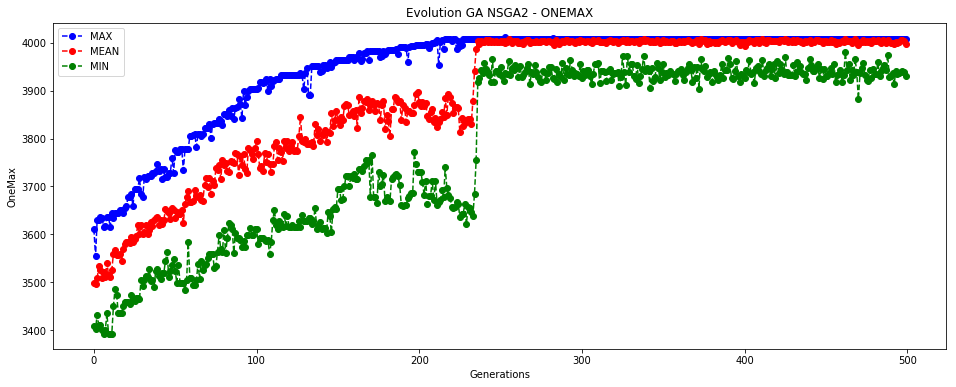

In [23]:
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosONEMAX, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosONEMAX, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosONEMAX, 'og--',label='MIN')
plt.xlabel('Generations')
plt.ylabel('OneMax')
plt.title('Evolution GA NSGA2 - ONEMAX')
plt.legend(loc='upper left')
plt.savefig("images/GraficoONEMAX.pdf",format="pdf")
#plt.show()


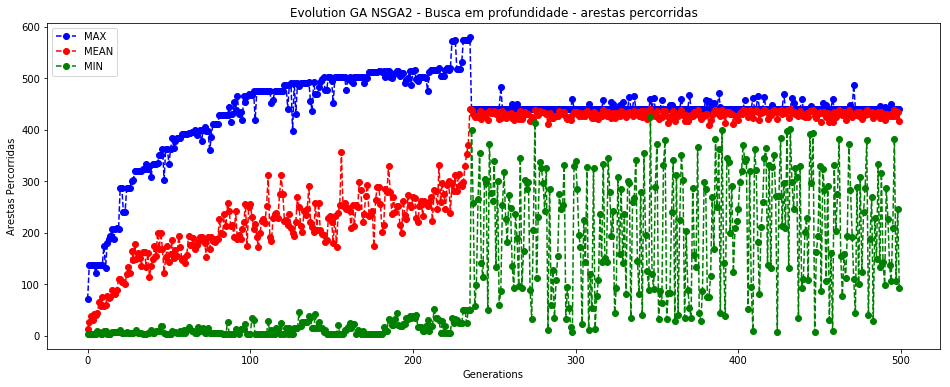

In [24]:
#
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosDFS, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosDFS, 'og--',label='MIN')
plt.xlabel('Generations')
plt.ylabel('Arestas Percorridas')
plt.title('Evolution GA NSGA2 - Busca em profundidade - arestas percorridas')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDFS.pdf",format="pdf")
#plt.show()


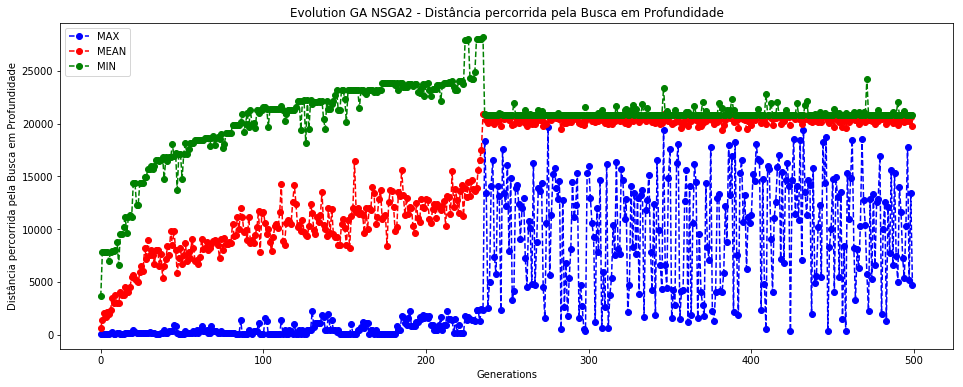

In [25]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinDistDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDistDFS, 'or--' ,label='MEAN')
plt.plot(PlotMaxDistDFS, 'og--',label='MIN')
plt.xlabel('Generations')
plt.ylabel('Distância percorrida pela Busca em Profundidade')
plt.title('Evolution GA NSGA2 - Distância percorrida pela Busca em Profundidade')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDistanciaPercorridaDFS.pdf",format="pdf")
#plt.show()

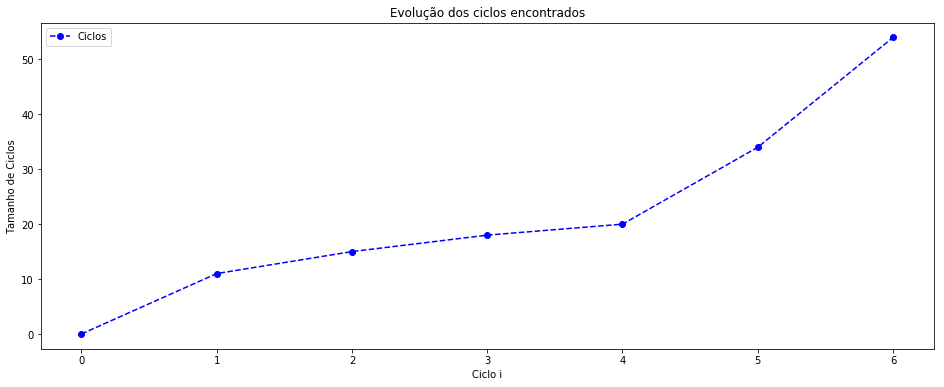

In [26]:
#
# Evolução dos ciclos encontrados
plt.figure(figsize=(16,6))
plt.plot(PlotMaioresCiclos, 'ob--' , label='Ciclos')
plt.xlabel('Ciclo i')
plt.ylabel('Tamanho de Ciclos')
plt.title('Evolução dos ciclos encontrados')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamanhoCiclos.pdf",format="pdf")
#plt.show()

# Plotagem das rotas geradas caso tenha encontrado

In [27]:
def salvarRotaTxt(via_vez, rota):
    try:
        path = "Rotas/Rota-"+str(via_vez)+".txt"
        arq = open(path, 'w')    
        for linha in rota:
            arq.write(linha+"\n")        
        arq.close()
    except:
        print("Erro salvar rota..")
    
def printFormatNamesStreet( via_vez , qtd_arestas, ruas ):
    
    try:
        contador = 1
        salvarText = []

        # +1 por causa do retorno do ciclo da rota    
        Rota = "Rota "+str(via_vez)+" - "+str(qtd_arestas)+" Arestas:\n"
        print(Rota)
        salvarText.append(Rota)

        for rua in ruas:
            concat = str(rua)
            Rua = ""+str(contador)+"ª - "+concat
            print(Rua)
            salvarText.append(Rua)
            contador = contador + 1

        Rua = ""+str(contador)+"ª - "+ruas[0]
        print(Rua)
        salvarText.append(Rua)

        salvarRotaTxt(via_vez, salvarText)
    except:
        print("Erro pegar rota..")
        
def printRotaRuas(via_vez, qtd_arestas, rota ):
    '''
    print(listaDadosNew[0])
    print()
    print(listaDadosNew[0][0])
    print()
    print(listaDadosNew[0][1])
    print()
    print(listaDadosNew[0][2])
    print()
    print(listaDadosNew[0][2]['name'])
    
    [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

    321519672

    3589971255

    {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}

    Rua Coronel Pinto
    
    '''
    try:
                
        tamListaDadosNew = len(listaDadosNew)
        tamRotaLista = len(rota)

        ruasRota = []

        '''
            Arrumar os nomes das ruas..
        '''


        for rota_i in range( tamRotaLista ):            
            for lista_i in range(tamListaDadosNew):            
                if( listaDadosNew[lista_i][0] == rota[rota_i][0] and listaDadosNew[lista_i][1] == rota[rota_i][1] ):

                    if 'name' in listaDadosNew[lista_i][2]:
                        rua = listaDadosNew[lista_i][2]['name']

                        if rua not in ruasRota:
                            ruasRota.append(rua)

                    else:
                        ruasRota.append("Unname")

                    '''
                    print(listaDadosNew[lista_i])
                    print(rota[rota_i])
                    print()
                    '''                    

        printFormatNamesStreet(via_vez, qtd_arestas, ruasRota )
        print("\n\n")

    except:
        print("Erro...")
        

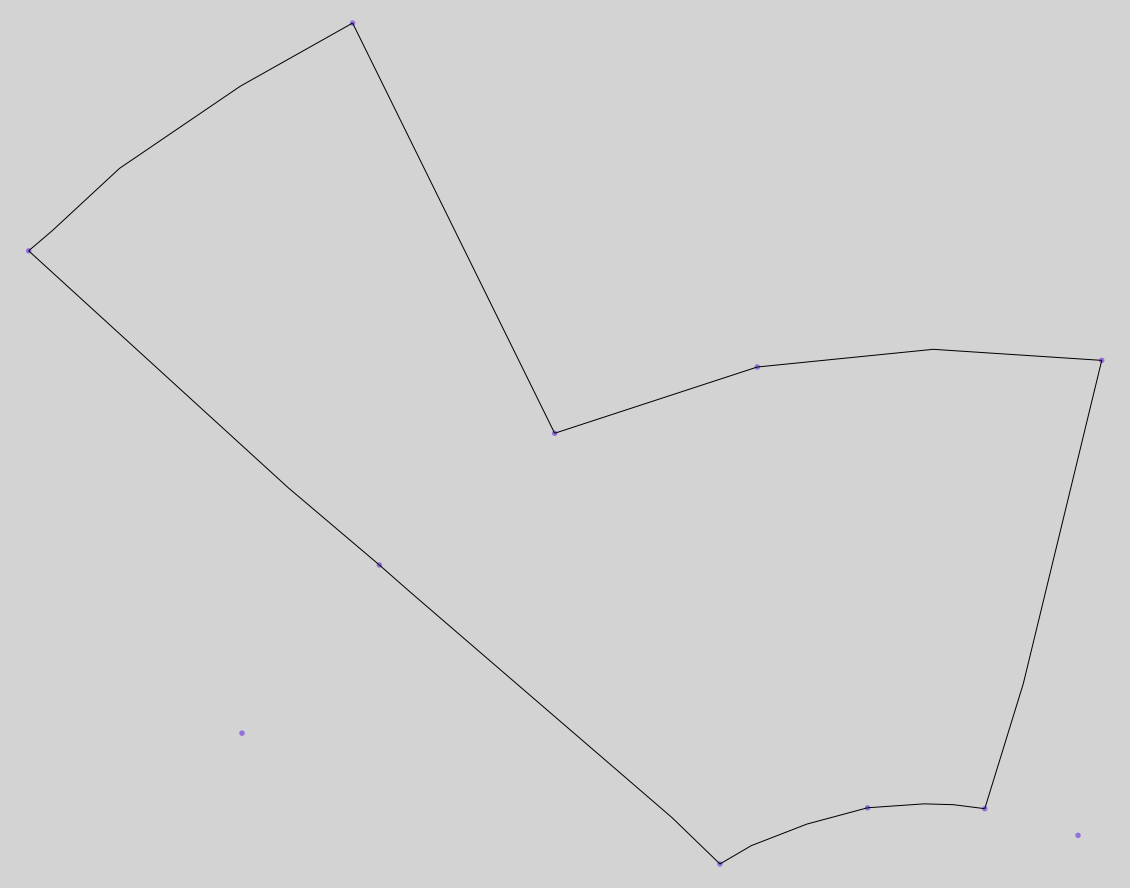



Rota 1 - 11 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Coronel Pinto
6ª - Avenida Capitão Júlio Bezerra
7ª - Avenida Amazonas
8ª - Avenida Capitão Ene Garcez





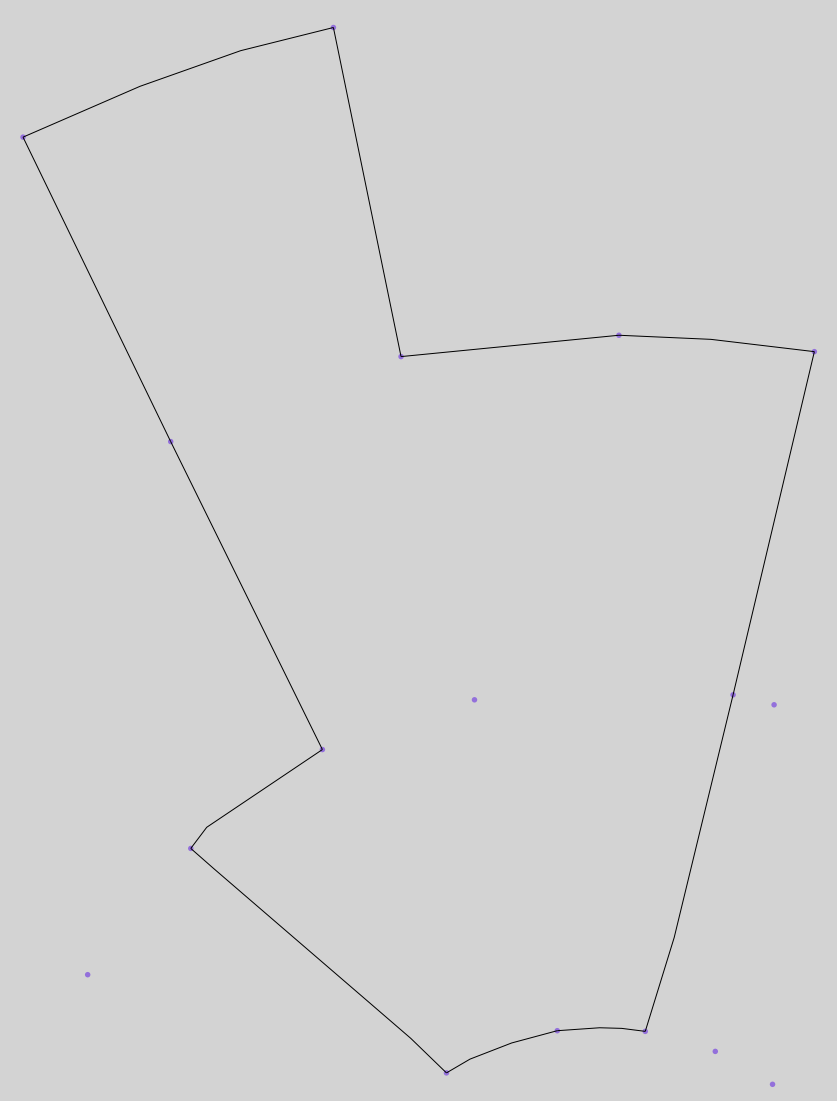



Rota 2 - 15 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Rua Coronel Pinto
3ª - Rua General Penha Brasil
4ª - Rua Barão do Rio Branco
5ª - Rua Professor Agnelo Bitencourt
6ª - Rua Alfredo Cruz
7ª - Avenida Capitão Júlio Bezerra
8ª - Avenida Amazonas
9ª - Avenida Capitão Ene Garcez





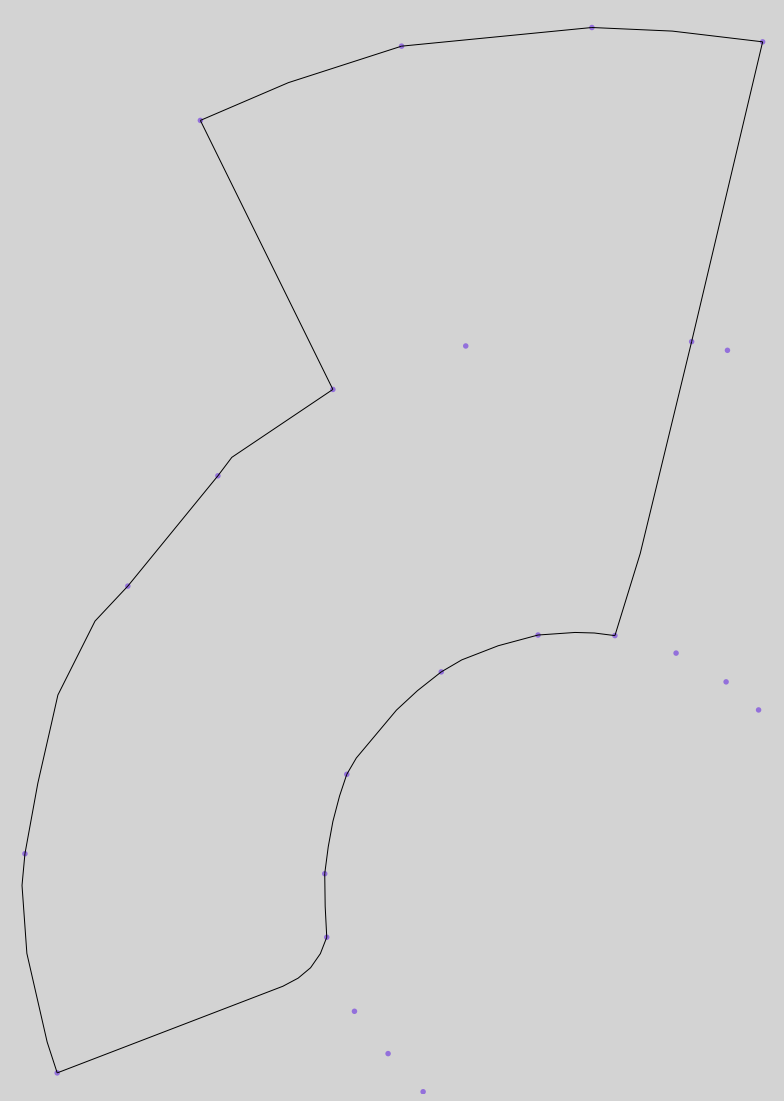



Rota 3 - 18 Arestas:

1ª - Avenida Amazonas
2ª - Avenida Glaycon de Paiva
3ª - Rua Araújo Filho
4ª - Avenida Capitão Ene Garcez
5ª - Rua Coronel Pinto
6ª - Rua General Penha Brasil
7ª - Rua Alfredo Cruz
8ª - Avenida Capitão Júlio Bezerra
9ª - Avenida Amazonas





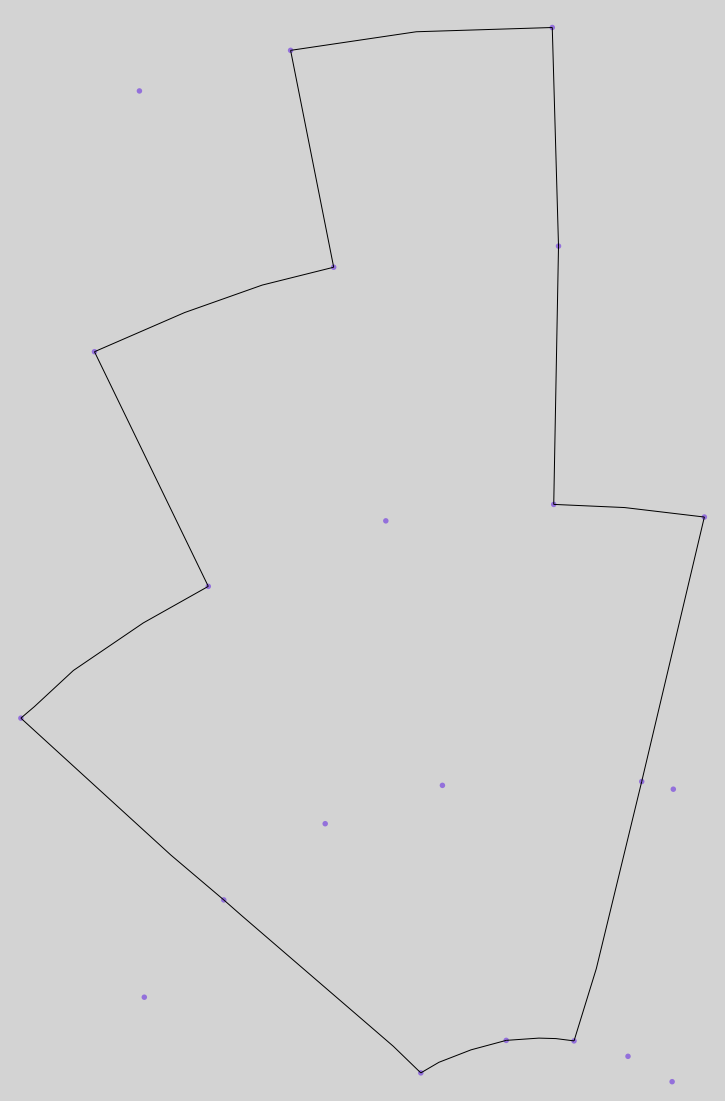



Rota 4 - 20 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Capitão Ene Garcêz
3ª - Rua Alfredo Cruz
4ª - Rua General Penha Brasil
5ª - Rua Barão do Rio Branco
6ª - Rua Professor Agnelo Bitencourt
7ª - Rua Coronel Mota
8ª - Rua Alferes Paulo Saldanha
9ª - Avenida Capitão Júlio Bezerra
10ª - Avenida Amazonas
11ª - Avenida Capitão Ene Garcez





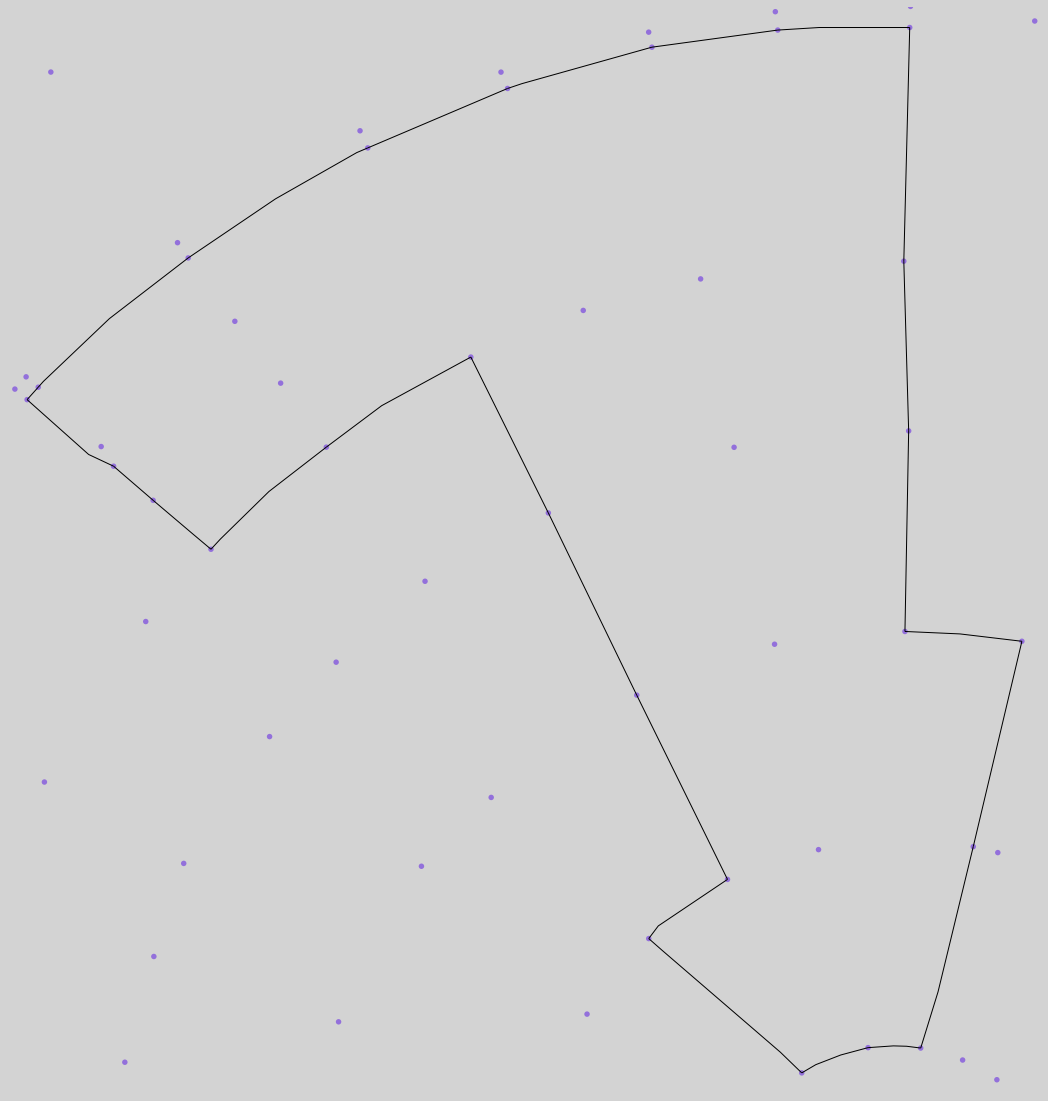



Rota 5 - 34 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Rua Coronel Pinto
3ª - Rua General Penha Brasil
4ª - Rua Coronel Mota
5ª - Avenida Capitão Ene Garcêz
6ª - Avenida Capitão Ene Garcês
7ª - Avenida Terêncio Lima
8ª - Avenida Major Williams
9ª - Rua Alferes Paulo Saldanha
10ª - Rua Alfredo Cruz
11ª - Avenida Capitão Júlio Bezerra
12ª - Avenida Amazonas
13ª - Avenida Capitão Ene Garcez





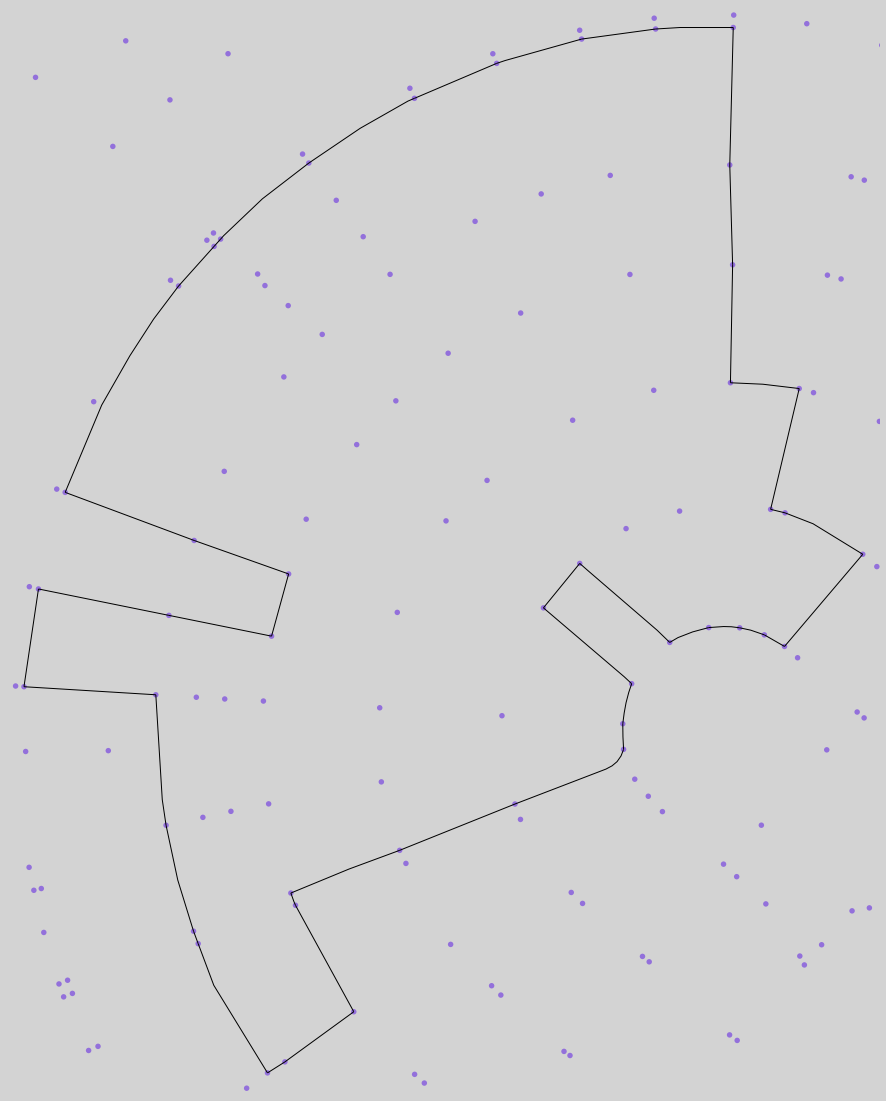



Rota 6 - 54 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Avenida Amazonas
3ª - Avenida Glaycon de Paiva
4ª - Rua Ajuricaba
5ª - Rua Professor Diomedes Souto Maior
6ª - Rua Cerejo Cruz
7ª - Avenida Mário Homem de Melo
8ª - Avenida Terêncio Lima
9ª - Rua Dom Pedro I
10ª - Rua Pedro Rodrigues
11ª - Avenida Major Williams
12ª - Rua Alferes Paulo Saldanha
13ª - Rua Alfredo Cruz
14ª - Avenida Capitão Júlio Bezerra
15ª - Rua Coronel Pinto
16ª - Avenida Ville Roy
17ª - Avenida Capitão Ene Garcez





In [28]:
removerNodosFinal = []
cont=1
contador = 0
if len(listaResultadoDFS) > 0:
    for cadaCicloEncontrado in range(len(listaResultadoDFS)):
        contador = contador + 1        
        for nodos in listaDadosNew:
            v = (nodos[0], nodos[1])

            if v not in listaResultadoDFS[ cadaCicloEncontrado ]:
                removerNodosFinal.append(v)

        if len(removerNodosFinal) > 0:
            G_aux = G.copy()
            G_aux.remove_edges_from(removerNodosFinal)
            
            # para salvar
            name = "Rota-"+ str(contador)
            fig, ax = ox.plot_graph(G_aux, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename=name, save=True,  file_format=formato_imgs)
            
            #fig, ax = ox.plot_graph(G_aux, fig_height=30, node_color='blue', node_size=5, node_zorder=1, node_edgecolor='k', )
            print("\n")
            removerNodosFinal.clear()
            
            '''
                Imprimir ruas do trajeto
            '''
            #print(PlotMaioresCiclos)
            printRotaRuas( contador, PlotMaioresCiclos[contador] , listaResultadoDFS[cadaCicloEncontrado] )
            
        
else:
    print("Infelizmente não foi possivel encontrar uma rota....")

 <h1 style="text-align: center;"> FIMMM --- Obrigado </h1>